**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree
from scipy.spatial import distance
from sklearn.neighbors import DistanceMetric
import operator

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
def func(a):
    i,j = np.unique(a,return_counts = True)
    return i[np.argmax(j)]

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metrics = 'minkowski'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metrics = metrics
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        pass
    
    def predict(self, X):
        self.X_test = np.asarray(X)
        if self.algorithm == 'kd_tree':
            if self.metrics == 'cosine':
                tree = KDTree(self.X_train,leaf_size = 40, metric = 'cosine')
            else:
                tree = KDTree(self.X_train)
            dist, ind = tree.query(self.X_test, k=self.n_neighbors)
            s = self.y_train[ind]
        else:
            y_pred = np.asarray([])
            if self.metrics == 'cosine':
                dist = distance.cdist(self.X_test,self.X_train,'cosine')
            else:
                dist = distance.cdist(self.X_test,self.X_train,'minkowski')
            s = self.y_train[np.argsort(dist,axis=1)[:,0:self.n_neighbors]]
        y_pred = np.apply_along_axis(func,1,s)
        return y_pred
                          

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [11]:
%time clf.predict(X_test)

Wall time: 4.72 ms


array([2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2])

In [12]:
%time my_clf.predict(X_test)

Wall time: 4.46 ms


array([2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

Wall time: 3.21 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [17]:
%time clf.predict(X_test)

Wall time: 4.91 ms


array([0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2])

In [18]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [51]:
count_vect = CountVectorizer(max_features = 500)
X = count_vect.fit_transform(newsgroups.data).toarray()
y = target

In [39]:
count_vect.vocabulary_

{'car': 193,
 'saw': 789,
 'day': 284,
 'looked': 555,
 'late': 523,
 'early': 330,
 'called': 189,
 'really': 744,
 'small': 831,
 'addition': 90,
 'rest': 769,
 'body': 170,
 'know': 515,
 'model': 603,
 'engine': 343,
 'years': 996,
 'history': 454,
 'info': 479,
 'looking': 556,
 'mail': 569,
 'number': 636,
 'send': 808,
 'message': 596,
 'speed': 848,
 'add': 89,
 'cards': 195,
 'floppy': 385,
 'disk': 313,
 '800': 73,
 'especially': 349,
 'days': 285,
 'network': 624,
 'knowledge': 516,
 'base': 150,
 'haven': 442,
 'thanks': 893,
 'folks': 386,
 'mac': 566,
 'plus': 689,
 'finally': 382,
 'gave': 404,
 'life': 537,
 'way': 961,
 'market': 579,
 'new': 625,
 'machine': 567,
 'bit': 164,
 'maybe': 584,
 'questions': 735,
 'answer': 108,
 'does': 318,
 'anybody': 111,
 'heard': 447,
 'supposed': 871,
 'make': 572,
 'don': 321,
 'access': 84,
 'price': 710,
 'line': 542,
 'like': 539,
 'ones': 647,
 'just': 507,
 'went': 966,
 'recently': 750,
 'display': 314,
 'probably': 715,
 'g

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [24]:
from sklearn.model_selection import cross_val_score

In [40]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf.fit(X,y)
cross_val_score(clf,X,y,cv=3, scoring='accuracy')

array([0.23568399, 0.22911695, 0.23813312])

In [52]:
scores_data = pd.DataFrame()

In [53]:
count_vect = CountVectorizer(max_features = 500 )
X = count_vect.fit_transform(newsgroups.data).toarray()
y = target

In [54]:
best_k, scores_data = Best_k_neighbors(X,y, cv = 3, metrics = 'minkowski') #сначала нужно запустить следующую вкладку (работать будет долго минут 15)

In [58]:
scores_data.head(10)

,K,cross_val_score
0,1,0.168375
0,2,0.156178
0,3,0.156266
0,4,0.158034
0,5,0.160774
0,6,0.160067
0,7,0.163249
0,8,0.167492
0,9,0.167669
0,10,0.169260


In [55]:
scores_data_cos = pd.DataFrame()

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X).toarray()

In [57]:
best_k_cos, scores_data_cos = Best_k_neighbors(X,y, cv = 3, metrics = 'cosine')

In [61]:
scores_data_cos.head(10)

,K,cross_val_score
0,1,0.331625
0,2,0.323670
0,3,0.321107
0,4,0.324024
0,5,0.334807
0,6,0.337724
0,7,0.340728
0,8,0.344352
0,9,0.339491
0,10,0.342762


In [62]:
best_k_cos,best_k

(8, 10)

In [63]:
scores_data_cos['cross_val_score'].max(),scores_data['cross_val_score'].max() #делаем вывод, что при к=8 и косинусной метрика наил рез

(0.3443524088832947, 0.16925987417322896)

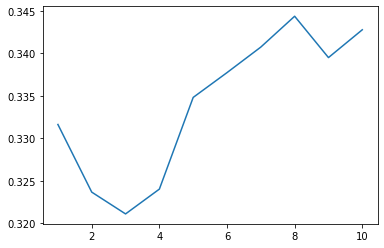

In [65]:
plt.plot(scores_data_cos['K'],scores_data_cos['cross_val_score'])
plt.show()

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [42]:
def Best_k_neighbors(X, y,metrics, cv = 3):
    scores_data = pd.DataFrame()
    if metrics == 'cosine':
        for i in range(1,11):
            clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metrics = 'cosine')
            clf.fit(X,y)
            mean_cross_val_score = cross_val_score(clf, X, y, cv=3,scoring ='accuracy' ).mean()
            temp_score_data = [{'K' : i, 'cross_val_score' : mean_cross_val_score}]
            scores_data = scores_data.append(temp_score_data)
    else:
        for i in range(1,11):
            clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='kd_tree')
            clf.fit(X,y)
            mean_cross_val_score = cross_val_score(clf, X, y, cv=3,scoring ='accuracy' ).mean()
            temp_score_data = [{'K' : i, 'cross_val_score' : mean_cross_val_score}]
            scores_data = scores_data.append(temp_score_data)
    best_k = np.argmax(scores_data['cross_val_score'])+1
    return best_k,scores_data

In [66]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X).toarray()

In [67]:
my_clf = MyKNeighborsClassifier(n_neighbors=best_k_cos, algorithm='brute', metrics = 'cosine') #выкатываем свою лучшую модель
my_clf.fit(X,y)

In [78]:
KDTree.valid_metrics # делаю вывод, что KDTree не работает с косинусной метрикой, поэтому использую brute

['euclidean',
 'l2',
 'minkowski',
 'p',
 'manhattan',
 'cityblock',
 'l1',
 'chebyshev',
 'infinity']

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [68]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [69]:
data = newsgroups['data']
target = newsgroups['target']

In [70]:
count_vect = CountVectorizer(max_features = 500)
X_pred = count_vect.fit_transform(newsgroups.data).toarray()
y_pred = target

In [71]:
tfidf_transformer = TfidfTransformer()
X_pred = tfidf_transformer.fit_transform(X_pred).toarray()
y_pred = target

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [72]:
my_clf = MyKNeighborsClassifier(n_neighbors=best_k_cos, algorithm='brute', metrics = 'cosine')
my_clf.fit(X_pred,y_pred)

In [73]:
y_my_pred = my_clf.predict(X_pred)

In [74]:
accuracy_score(y_pred, y_my_pred)

0.4928305894848646

Вывод: Качество отличается от кросс-валидации,я думаю это связано с тем, что на кросс-валидации модель обучается с 2/3 данных, а на тесте приходит целая часть, соответственно из-за этого скор может быть выше.
P.S: Можно было бы еще поэксперементировать с подачей данных менять частоту,max_features,убирать стоп-слова и т.д. Но в силу мощности своего ПК, я не могу этого сделать, поэтому везде ставил дефолтно max_features = 500